In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv
/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json


In [2]:
data = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
data.shape

(10261, 9)

In [4]:
data = data.drop(['reviewerID', 'asin','reviewerName', 'unixReviewTime', 'helpful'], axis = 1)
data.head()

,reviewText,overall,summary,reviewTime
0,"Not much to write about here, but it does exac...",5.0,good,"02 28, 2014"
1,The product does exactly as it should and is q...,5.0,Jake,"03 16, 2013"
2,The primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013"
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,"02 21, 2014"


In [5]:
data.isna().sum()

reviewText    7
overall       0
summary       0
reviewTime    0
dtype: int64

In [6]:
data['reviewText'].fillna('Null', inplace = True)
data.isna().any()

reviewText    False
overall       False
summary       False
reviewTime    False
dtype: bool

In [7]:
data['overall'].unique()

array([5., 3., 4., 2., 1.])

In [8]:
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
data['rating'] = data['overall'].apply(rating)
data = data.drop(['overall'], axis = 1)
data.head()

,reviewText,summary,reviewTime,rating
0,"Not much to write about here, but it does exac...",good,"02 28, 2014",1
1,The product does exactly as it should and is q...,Jake,"03 16, 2013",1
2,The primary job of this device is to block the...,It Does The Job Well,"08 28, 2013",1
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",1
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,"02 21, 2014",1


In [9]:
data.rating.unique()

array([1, 0])

### Good and Bad reviews viz

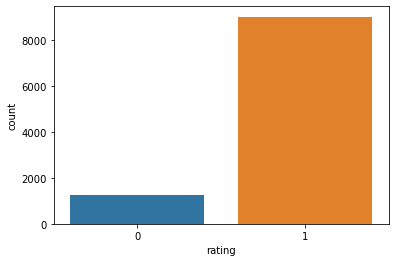

In [10]:
sns.countplot(data.rating)

Most of the reviews are good

In [11]:
data['reviewText'] = data['reviewText'] + data['summary']
data = data.drop(['summary'], axis = 1)
data.head()

,reviewText,reviewTime,rating
0,"Not much to write about here, but it does exac...","02 28, 2014",1
1,The product does exactly as it should and is q...,"03 16, 2013",1
2,The primary job of this device is to block the...,"08 28, 2013",1
3,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",1
4,This pop filter is great. It looks and perform...,"02 21, 2014",1


In [12]:
x = pd.DataFrame(data['reviewText'])
y = pd.DataFrame(data.rating)
data.reviewText = data.reviewText.astype('str')

* removing stop words
* removing punctuations
* tokenization
* lemmatization
* bow
* tf-idf 

In [13]:
nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
data.reviewText = data.reviewText.apply(furnished)

In [14]:
data.reviewText.describe()

count                      10261
unique                     10256
top       good stringsfive stars
freq                           3
Name: reviewText, dtype: object

### Common words viz

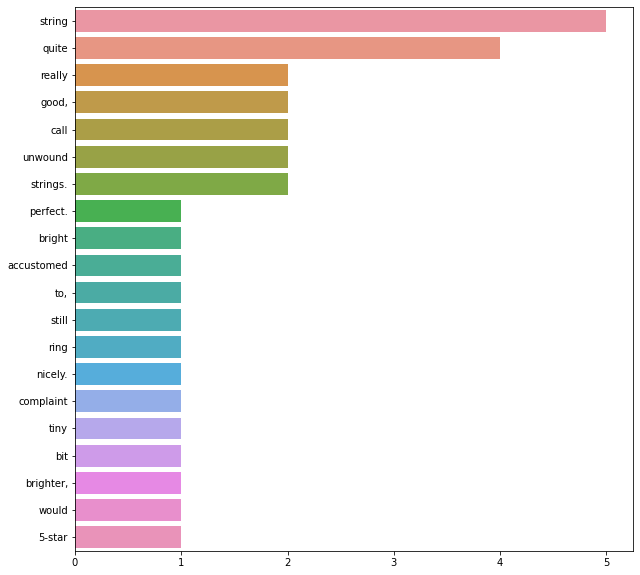

In [15]:
for i in data.reviewText:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

In [16]:
data.head()

,reviewText,reviewTime,rating
0,"much write here, exactly supposed to. filter p...","02 28, 2014",1
1,product exactly quite affordable.i realized do...,"03 16, 2013",1
2,primary job device block breath would otherwis...,"08 28, 2013",1
3,nice windscreen protects mxl mic prevents pops...,"02 14, 2014",1
4,pop filter great. look performs like studio fi...,"02 21, 2014",1


In [17]:
x_train,x_test,y_train,y_test = train_test_split(data.reviewText,data.rating,test_size = 0.2 , random_state = 0)

In [18]:
#bow
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(x_train)
bow_x_test = cv.transform(x_test)

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (8208, 590454)
bow_x_test: (2053, 590454)


In [19]:
#tf-idf 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tfidf_x_train =tv.fit_transform(x_train)
tfidf_x_test =tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)


tfidf_x_train: (8208, 590454)
tfidf_x_test: (2053, 590454)


### Model Fitting, Prediction and accuracy

In [20]:
#Naive Bayes
nb = MultinomialNB()

#fit
bow = nb.fit(bow_x_train, y_train)
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
bow_predict = nb.predict(bow_x_test)
tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_bow = accuracy_score(y_test, bow_predict)
nb_tfidf = accuracy_score(y_test,tfidf_predict)

print('nb bow accuracy:', nb_bow)
print('tfidf accuracy:', nb_tfidf)

nb bow accuracy: 0.8894301022893327
tfidf accuracy: 0.8889430102289333


In [21]:
#random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
bow = rf.fit(bow_x_train, y_train)
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
bow_predict = rf.predict(bow_x_test)
tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_bow = accuracy_score(y_test, bow_predict)
rf_tfidf = accuracy_score(y_test,tfidf_predict)

print('rf bow accuracy:', rf_bow)
print('rf tfidf accuracy:', rf_tfidf)

rf bow accuracy: 0.8889430102289333
rf tfidf accuracy: 0.8889430102289333


In [22]:
#Linear SVC
ls =  LinearSVC()

#fit
bow = ls.fit(bow_x_train, y_train)
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
bow_predict = ls.predict(bow_x_test)
tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_bow = accuracy_score(y_test, bow_predict)
ls_tfidf = accuracy_score(y_test,tfidf_predict)

print('ls bow accuracy:', ls_bow)
print('ls tfidf accuracy:', ls_tfidf)

ls bow accuracy: 0.8884559181685339
ls tfidf accuracy: 0.8899171943497322


In [23]:
#lr
lr = LogisticRegression(random_state=0)

#fit
bow = lr.fit(bow_x_train, y_train)
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
bow_predict = lr.predict(bow_x_test)
tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_bow = accuracy_score(y_test, bow_predict)
lr_tfidf = accuracy_score(y_test,tfidf_predict)

print('lr bow accuracy:', lr_bow)
print('lr tfidf accuracy:', lr_tfidf)

lr bow accuracy: 0.8899171943497322
lr tfidf accuracy: 0.8889430102289333


In [24]:
data = {'accuracy': [nb_bow * 100, nb_tfidf * 100, rf_bow * 100, rf_tfidf * 100, lr_bow * 100, lr_tfidf * 100, ls_tfidf * 100, ls_bow * 100],
                   'model': ['naive bayes bow', 'naive bayes tfidf', 'random forest bow', 'random forest tfidf', 
                                'logit bow', 'logit tfidf', 'SVM bow', 'SVM tfidf']}
df = pd.DataFrame(data, columns = ['accuracy', 'model'])
df.head(8)

,accuracy,model
0,88.943010,naive bayes bow
1,88.894301,naive bayes tfidf
2,88.894301,random forest bow
3,88.894301,random forest tfidf
4,88.991719,logit bow
5,88.894301,logit tfidf
6,88.991719,SVM bow
7,88.845592,SVM tfidf


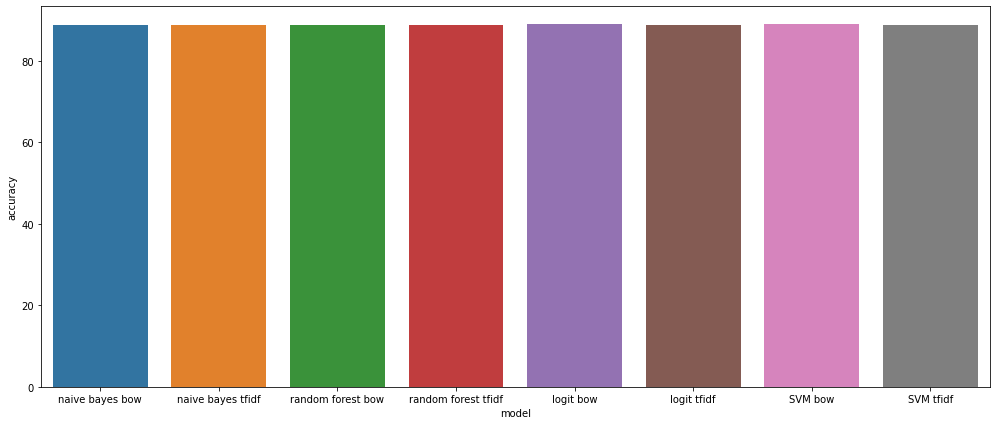

In [25]:
plt.figure(figsize = (17,7))
sns.barplot(y = df.accuracy, x = df.model)

around the same accuracy of 89%